# House Price Prediction using Machine Learning

This project builds regression models to predict house prices based on
area, bedrooms, bathrooms, age, location and property type.

Models used:
- Linear Regression
- Polynomial Regression
- Decision Tree
- Random Forest

Evaluation metrics:
MAE, MSE, R² Score


In [93]:
import pandas as pd

In [76]:
df=pd.read_csv('house_prices.csv')
# Load dataset into pandas dataframe

In [78]:
df.head()
# Preview first few rows to understand structure

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [95]:
# Check missing values in each column
df.isnull().sum()


Property_ID        0
Area               0
Bedrooms           0
Bathrooms          0
Age                0
Price              0
Location_n         0
Property_Type_n    0
dtype: int64

In [82]:
import matplotlib.pyplot as plt
from sklearn import linear_model

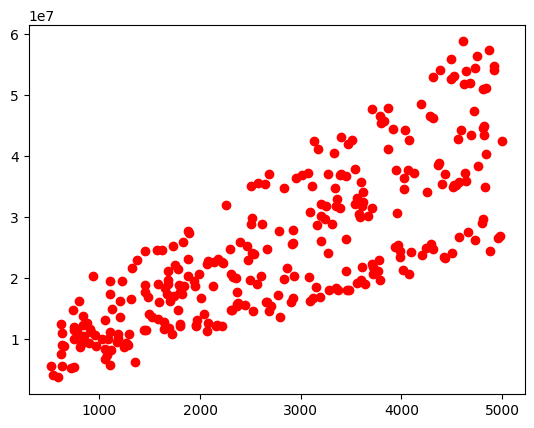

In [84]:
# Visualize relationship between Area and Price
# Helps understand if linear trend exists
plt.scatter(df['Area'],df['Price'],color='red')
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder
le_loc = LabelEncoder()
le_type = LabelEncoder()

df['Location_n'] = le_loc.fit_transform(df['Location'])
df['Property_Type_n'] = le_type.fit_transform(df['Property_Type'])

# Convert categorical columns into numeric using Label Encoding
# ML models cannot work with text categories



In [88]:
df.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price,Location_n,Property_Type_n
0,PROP0001,3712,4,3,36,Rural,House,22260000,1,1
1,PROP0002,1591,4,1,35,Suburb,House,16057500,2,1
2,PROP0003,1646,4,3,20,Rural,Villa,12730000,1,2
3,PROP0004,4814,1,2,13,City Center,Villa,50840000,0,2
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000,2,0


In [90]:
df=df.drop(['Property_Type','Location'],axis='columns')

In [27]:
from sklearn.linear_model import LinearRegression


In [29]:
model = LinearRegression()

In [31]:
X=df[['Area','Bedrooms','Bathrooms','Age','Location_n','Property_Type_n']]
y=df['Price']

# Select input features (X) and target variable (y)
# Price is target — must not be included in X


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split data into training and testing sets
# 80% train, 20% test for unbiased evaluation



In [35]:
model.fit(X_train,y_train)

# Train Linear Regression model on training data


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred=model.predict(X_test)

# Generate predictions on unseen test data


In [39]:
model.predict([[1646,4,3,20,1,2]])

C:\Users\hp\mlenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19037390.16284125])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))


MAE: 5411099.797604775
MSE: 42074706077812.28
R2 Score: 0.7045684833622563


MAE — Mean Absolute Error
Average absolute difference between actual and predicted prices.
Lower MAE = better accuracy.
Unit is same as target (price).

MSE — Mean Squared Error
Average of squared differences between actual and predicted values.
Penalizes large errors more strongly.

R² Score — Coefficient of Determination
Measures how well the model explains variance in price.

Higher R² = better model fit(close to 1)

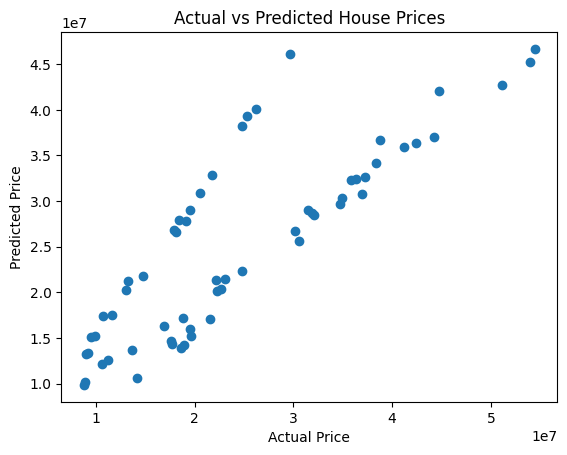

In [44]:

plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

pred_poly = model_poly.predict(X_test)
print("R2 (Polynomial):", r2_score(y_test, pred_poly))

# Improve model by adding polynomial feature interactions
# Captures non-linear relationships



R2 (Polynomial): 0.9578292878259762


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


# Train tree-based models to compare performance
# These capture non-linear patterns automatically


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)

## Model Performance Comparison

We compare models using R² score.
The model with highest R² explains the most price variation.


In [106]:

r2_linear = r2_score(y_test, predictions)
r2_dt = r2_score(y_test, pred_dt)
r2_rf = r2_score(y_test, pred_rf)

print("Linear Regression R2:", r2_linear)
print("Decision Tree R2:", r2_dt)
print("Random Forest R2:", r2_rf)


Linear Regression R2: 0.7045684833622563
Decision Tree R2: 0.9532447658186809
Random Forest R2: 0.9725132436565648


In [52]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

features = poly.get_feature_names_out(X.columns)
importance = rf.feature_importances_

pd.DataFrame({
    "Feature": features,
    "Importance": importance
})

# Analyze which features influence house price most
# Based on Random Forest importance scores


,Feature,Importance
0,1,0.000000
1,Area,0.287966
2,Bedrooms,0.001152
3,Bathrooms,0.000322
4,Age,0.001469
5,Location_n,0.024550
6,Property_Type_n,0.000146
7,Area^2,0.345303
8,Area Bedrooms,0.040365
9,Area Bathrooms,0.004693


In [54]:
print(len(importance))
print(len(features))

28
28


In [56]:
new_house = [[2500, 3, 2, 10, 1, 0]]  # sample input
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price)


Predicted Price: [24339439.1336051]


C:\Users\hp\mlenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


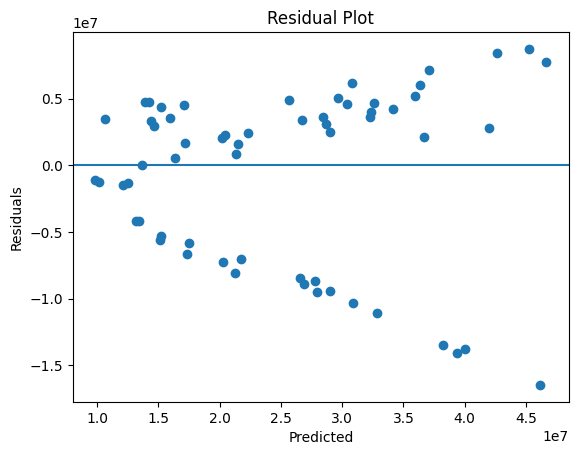

In [97]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0)
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()


## Final Conclusion

- Random Forest achieved highest R² score → best performer
- Area and Location are strongest price predictors
- Tree-based models captured non-linear patterns better than linear regression
- Model can be further improved with more data and feature engineering
